# Group Assignment

### Import the necessary libraries

In [90]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## PART I

## Examination of the January Effect
### The January Effect's main hypothesis states that stock returns are, on average, higher during January than during other months.

### 1. Download pricing data from Yahoo!Finance for each of the stocks in the ticker_list below and compute the continuously compounded daily returns using the Adjusted Closing price. Store these daily returns in a DataFrame called returns. Label the columns as 'RET_ticker', where ticker represents the trading symbol of the stock whose returns are stored in that column.

In [14]:
ticker_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']

In [15]:
yahoo = web.DataReader(ticker_list, 'yahoo')


In [16]:
yahoo.head()

Attributes   Adj Close                                               \
Symbols           AAPL        AXP          BA        CAT       CSCO   
Date                                                                  
2015-03-30  116.293190  72.154945  133.350861  68.734268  23.614830   
2015-03-31  114.507881  72.461044  131.062851  67.602356  23.692286   
2015-04-01  114.342239  73.212372  129.805298  67.272911  23.451321   
2015-04-02  115.326912  73.926575  130.364212  67.779747  23.348049   
2015-04-06  117.195030  73.861656  131.805084  68.835617  23.425501   

Attributes                                                            ...  \
Symbols           CVX        DIS          GS          HD         IBM  ...   
Date                                                                  ...   
2015-03-30  86.963852  98.905266  176.669342  102.226501  130.638016  ...   
2015-03-31  85.401924  97.758888  173.848450  101.316872  128.895309  ...   
2015-04-01  85.247337  98.271484  177.788361  100.888817  127.835228  ...   
2015-04-02  85.645958  98.793427  177.159470  102.146255  128.855179  ...   
2015-04-06  86.980110  98.448570  177.621933  102.511871  130.132080  ...   

Attributes     Volume                                                          \
Symbols           NKE         PFE         PG        TRV        UNH        UTX   
Date                                                                            
2015-03-30  5435400.0  25512700.0  6416800.0  2033200.0  5178500.0  3000800.0   
2015-03-31  6309200.0  26506600.0  8649700.0  1944800.0  4573100.0  3525400.0   
2015-04-01  6605400.0  32242900.0  7395300.0  1860100.0  4826200.0  3426200.0   
2015-04-02  3840400.0  25111800.0  6169800.0  1105600.0  2497100.0  4227300.0   
2015-04-06  5027400.0  21480500.0  6856300.0  1052700.0  2544700.0  2857300.0   

Attributes                                                 
Symbols              V          VZ        WMT         XOM  
Date                                                       
2015-03-30  11237100.0  11157600.0  5701700.0  15653200.0  
2015-03-31   7400500.0  12785700.0  5587700.0  13354000.0  
2015-04-01   7633000.0  13573600.0  8306700.0  14522300.0  
2015-04-02   5083000.0  13344200.0  5795700.0  11297400.0  
2015-04-06   8351200.0  14130000.0  6380700.0  10916400.0  

[5 rows x 168 columns]

In [17]:
adj_close = yahoo['Adj Close']
tickers = adj_close.columns

In [18]:
returns = pd.DataFrame() 
for ticker in tickers:
    returns['RET_'+ticker]= np.log(adj_close[ticker]/adj_close[ticker].shift(1))

    
returns # return for each ticker 

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,-0.015471,0.004233,-0.017307,-0.016605,0.003275,-0.018124,-0.011658,-0.016096,-0.008938,-0.013430,...,-0.005566,-0.006018,-0.009474,-0.013868,-0.022651,-0.013812,-0.003815,-0.010026,-0.003399,-0.007384
2015-04-01,-0.001448,0.010315,-0.009641,-0.004885,-0.010223,-0.001812,0.005230,0.022410,-0.004234,-0.008258,...,-0.007805,-0.013310,0.004627,-0.009478,-0.007127,-0.010982,-0.003523,0.005945,-0.018901,-0.006373
2015-04-02,0.008575,0.009708,0.004297,0.007506,-0.004413,0.004665,0.005297,-0.003544,0.012387,0.007947,...,0.001104,0.001455,0.001335,0.005864,-0.000767,0.010384,0.001686,0.011180,0.000248,-0.001896
2015-04-06,0.016069,-0.000879,0.010992,0.015458,0.003312,0.015457,-0.003497,0.002607,0.003573,0.009861,...,0.000702,0.002905,0.007373,0.003613,0.002893,0.006213,-0.001380,0.003229,0.003215,0.009798
2015-04-07,-0.010578,-0.016460,0.009168,-0.011726,0.006226,0.015038,-0.001895,0.001769,-0.005670,0.000185,...,-0.001204,0.001739,-0.007859,-0.007333,-0.002978,-0.003144,0.009160,-0.007280,-0.006068,0.007257
2015-04-08,-0.003259,0.004585,0.006805,-0.001242,0.005825,-0.017473,0.008782,0.000883,0.011223,-0.001358,...,0.012272,0.002891,0.004602,0.000000,0.007133,0.002974,0.010582,0.008380,0.006562,-0.019905
2015-04-09,0.007614,0.005955,0.000391,0.002979,0.002899,0.002715,0.003847,0.012027,-0.008864,0.003023,...,-0.001190,0.011196,0.001449,-0.000373,0.003041,0.000339,-0.000903,-0.002446,-0.002347,0.006994
2015-04-10,0.004258,0.005417,0.006238,0.023519,0.014730,-0.000374,0.001685,0.003841,0.005831,0.003198,...,-0.007474,0.011636,0.005534,0.003257,0.003789,0.004908,-0.001506,0.004276,-0.002353,0.010693


### 2. Compute the monthly returns and store them in a DataFrame named returns_mon. (*Use the resample() method and the rule = 'BM' - Business Month End to compute the monthly returns*). 

In [25]:
returns_mon = returns.resample(rule='BM').sum()
returns_mon

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,-0.015471,0.004233,-0.017307,-0.016605,0.003275,-0.018124,-0.011658,-0.016096,-0.008938,-0.013430,...,-0.005566,-0.006018,-0.009474,-0.013868,-0.022651,-0.013812,-0.003815,-0.010026,-0.003399,-0.007384
2015-04-30,0.005770,-0.008614,-0.045949,0.090380,0.046140,0.056301,0.035864,0.043973,-0.060129,0.065064,...,-0.014962,-0.025031,-0.022094,-0.067125,-0.060012,-0.029879,0.009737,0.047769,-0.052413,0.027501
2015-05-29,0.044341,0.028888,-0.013481,-0.018119,0.016512,-0.065426,0.015063,0.051657,0.040665,0.005593,...,0.033690,0.032121,-0.014186,0.000099,0.076113,0.035091,0.040795,-0.020025,-0.043352,-0.016914
2015-06-30,-0.037938,-0.021673,-0.012892,-0.005877,-0.065198,-0.065497,0.033587,0.012531,0.002691,-0.042075,...,0.060584,-0.035739,-0.001915,-0.038947,0.019007,-0.054727,-0.022529,-0.058945,-0.046013,-0.023754
2015-07-31,-0.033481,-0.021590,0.038536,-0.066587,0.042040,-0.086455,0.055865,-0.017978,0.051729,-0.004127,...,0.064527,0.072744,-0.011725,0.093371,-0.004930,-0.100634,0.115082,0.015563,0.014695,-0.049144
2015-08-31,-0.068489,0.008640,-0.091882,-0.028247,-0.093623,-0.075930,-0.163696,-0.080282,-0.004882,-0.082799,...,-0.030579,-0.104813,-0.081881,-0.063911,-0.048090,-0.084214,-0.053478,-0.016811,-0.099358,-0.042107
2015-09-30,-0.022058,-0.034342,0.002064,-0.156596,0.014196,-0.026398,0.003136,-0.081953,-0.003285,-0.019942,...,0.100748,-0.025461,0.017811,0.006058,0.006992,-0.029016,-0.023270,-0.055868,0.001698,-0.011899
2015-10-30,0.080113,-0.008028,0.122870,0.121526,0.102476,0.141612,0.106984,0.076104,0.068190,-0.034313,...,0.063486,0.073926,0.068835,0.125955,0.015142,0.100618,0.107683,0.087507,-0.124670,0.106919
2015-11-30,-0.005821,-0.022361,-0.011689,-0.004669,-0.057056,0.016969,-0.002377,0.016769,0.079570,0.004614,...,0.009495,-0.023500,-0.020368,0.014772,-0.044000,-0.017831,0.020060,-0.030978,0.027569,-0.004459


### 3. Create a dummy variable (labeled "JAN_DUMMY") in the DataFrame returns_mon, and assign it a value of 1 if the month is January, and 0 otherwise.

In [26]:
returns_mon.reset_index(inplace=True)

In [27]:
returns_mon.loc[returns_mon['Date'].dt.month==1, 'JAN_DUMMY']=1
returns_mon.loc[returns_mon['Date'].dt.month!=1, 'JAN_DUMMY']=0

returns_mon.head(12)

,Date,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
0,2015-03-31,-0.015471,0.004233,-0.017307,-0.016605,0.003275,-0.018124,-0.011658,-0.016096,-0.008938,...,-0.006018,-0.009474,-0.013868,-0.022651,-0.013812,-0.003815,-0.010026,-0.003399,-0.007384,0.0
1,2015-04-30,0.005770,-0.008614,-0.045949,0.090380,0.046140,0.056301,0.035864,0.043973,-0.060129,...,-0.025031,-0.022094,-0.067125,-0.060012,-0.029879,0.009737,0.047769,-0.052413,0.027501,0.0
2,2015-05-29,0.044341,0.028888,-0.013481,-0.018119,0.016512,-0.065426,0.015063,0.051657,0.040665,...,0.032121,-0.014186,0.000099,0.076113,0.035091,0.040795,-0.020025,-0.043352,-0.016914,0.0
3,2015-06-30,-0.037938,-0.021673,-0.012892,-0.005877,-0.065198,-0.065497,0.033587,0.012531,0.002691,...,-0.035739,-0.001915,-0.038947,0.019007,-0.054727,-0.022529,-0.058945,-0.046013,-0.023754,0.0
4,2015-07-31,-0.033481,-0.021590,0.038536,-0.066587,0.042040,-0.086455,0.055865,-0.017978,0.051729,...,0.072744,-0.011725,0.093371,-0.004930,-0.100634,0.115082,0.015563,0.014695,-0.049144,0.0
5,2015-08-31,-0.068489,0.008640,-0.091882,-0.028247,-0.093623,-0.075930,-0.163696,-0.080282,-0.004882,...,-0.104813,-0.081881,-0.063911,-0.048090,-0.084214,-0.053478,-0.016811,-0.099358,-0.042107,0.0
6,2015-09-30,-0.022058,-0.034342,0.002064,-0.156596,0.014196,-0.026398,0.003136,-0.081953,-0.003285,...,-0.025461,0.017811,0.006058,0.006992,-0.029016,-0.023270,-0.055868,0.001698,-0.011899,0.0
7,2015-10-30,0.080113,-0.008028,0.122870,0.121526,0.102476,0.141612,0.106984,0.076104,0.068190,...,0.073926,0.068835,0.125955,0.015142,0.100618,0.107683,0.087507,-0.124670,0.106919,0.0
8,2015-11-30,-0.005821,-0.022361,-0.011689,-0.004669,-0.057056,0.016969,-0.002377,0.016769,0.079570,...,-0.023500,-0.020368,0.014772,-0.044000,-0.017831,0.020060,-0.030978,0.027569,-0.004459,0.0
9,2015-12-31,-0.116790,-0.029608,-0.005930,-0.066734,-0.003308,-0.015005,-0.070427,-0.052896,-0.007833,...,-0.015066,0.059272,-0.009653,0.047121,0.000208,-0.018651,0.016800,0.049299,-0.046497,0.0


In [28]:
returns_mon.set_index('Date', inplace=True)
returns_mon.head(12)

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,-0.015471,0.004233,-0.017307,-0.016605,0.003275,-0.018124,-0.011658,-0.016096,-0.008938,-0.013430,...,-0.006018,-0.009474,-0.013868,-0.022651,-0.013812,-0.003815,-0.010026,-0.003399,-0.007384,0.0
2015-04-30,0.005770,-0.008614,-0.045949,0.090380,0.046140,0.056301,0.035864,0.043973,-0.060129,0.065064,...,-0.025031,-0.022094,-0.067125,-0.060012,-0.029879,0.009737,0.047769,-0.052413,0.027501,0.0
2015-05-29,0.044341,0.028888,-0.013481,-0.018119,0.016512,-0.065426,0.015063,0.051657,0.040665,0.005593,...,0.032121,-0.014186,0.000099,0.076113,0.035091,0.040795,-0.020025,-0.043352,-0.016914,0.0
2015-06-30,-0.037938,-0.021673,-0.012892,-0.005877,-0.065198,-0.065497,0.033587,0.012531,0.002691,-0.042075,...,-0.035739,-0.001915,-0.038947,0.019007,-0.054727,-0.022529,-0.058945,-0.046013,-0.023754,0.0
2015-07-31,-0.033481,-0.021590,0.038536,-0.066587,0.042040,-0.086455,0.055865,-0.017978,0.051729,-0.004127,...,0.072744,-0.011725,0.093371,-0.004930,-0.100634,0.115082,0.015563,0.014695,-0.049144,0.0
2015-08-31,-0.068489,0.008640,-0.091882,-0.028247,-0.093623,-0.075930,-0.163696,-0.080282,-0.004882,-0.082799,...,-0.104813,-0.081881,-0.063911,-0.048090,-0.084214,-0.053478,-0.016811,-0.099358,-0.042107,0.0
2015-09-30,-0.022058,-0.034342,0.002064,-0.156596,0.014196,-0.026398,0.003136,-0.081953,-0.003285,-0.019942,...,-0.025461,0.017811,0.006058,0.006992,-0.029016,-0.023270,-0.055868,0.001698,-0.011899,0.0
2015-10-30,0.080113,-0.008028,0.122870,0.121526,0.102476,0.141612,0.106984,0.076104,0.068190,-0.034313,...,0.073926,0.068835,0.125955,0.015142,0.100618,0.107683,0.087507,-0.124670,0.106919,0.0
2015-11-30,-0.005821,-0.022361,-0.011689,-0.004669,-0.057056,0.016969,-0.002377,0.016769,0.079570,0.004614,...,-0.023500,-0.020368,0.014772,-0.044000,-0.017831,0.020060,-0.030978,0.027569,-0.004459,0.0


### 4. Use the DataFrame returns_mon to compute the average returns in January, and during non-January months for each year and for each stock, and store them in a new DataFrame named returns_jan_mon. 

In [80]:
returns_jan_mon = returns_mon.groupby(["JAN_DUMMY", returns_mon.index.year]).mean()
returns_jan_mon

RET_AAPL   RET_AXP    RET_BA   RET_CAT  RET_CSCO   RET_CVX  \
JAN_DUMMY Date                                                               
0.0       2015 -0.016982 -0.010445 -0.003566 -0.015153  0.000545 -0.013795   
          2016  0.017803  0.030939  0.027287  0.038807  0.024149  0.031991   
          2017  0.031685  0.024931  0.056168  0.047322  0.022465  0.014192   
          2018 -0.004065 -0.002816 -0.006800 -0.020925  0.005882 -0.009440   
          2019  0.052970  0.018444 -0.013265  0.011367  0.003111  0.008152   
          2020 -0.110120 -0.190468 -0.334686 -0.109862 -0.084527 -0.215802   
1.0       2016 -0.078223 -0.257997 -0.185328 -0.062534 -0.124718 -0.039568   
          2017  0.046642  0.034831  0.048521  0.039264  0.024960 -0.055461   
          2018 -0.010693  0.004428  0.183671  0.037097  0.088638  0.001277   
          2019  0.053687  0.078657  0.178749  0.053226  0.095167  0.052465   
          2020  0.052602  0.045769 -0.023261 -0.110192 -0.035054 -0.117596   

                 RET_DIS    RET_GS    RET_HD   RET_IBM  ...   RET_NKE  \
JAN_DUMMY Date                                          ...             
0.0       2015  0.000234 -0.004817  0.015778 -0.013441  ...  0.022966   
          2016  0.008995  0.037172  0.007738  0.030204  ... -0.016745   
          2017 -0.001215  0.010702  0.031193 -0.008255  ...  0.016438   
          2018  0.002246 -0.041691 -0.012183 -0.029136  ...  0.008586   
          2019  0.024738  0.015442  0.018248  0.004002  ...  0.020315   
          2020 -0.180496 -0.200190 -0.086601 -0.137570  ... -0.071545   
1.0       2016 -0.092250 -0.109357 -0.050319 -0.097864  ... -0.007871   
          2017  0.059868 -0.043226  0.025769  0.050112  ...  0.039917   
          2018  0.010732  0.050255  0.058260  0.064856  ...  0.086772   
          2019  0.016910  0.170024  0.065931  0.167670  ...  0.099300   
          2020 -0.044681  0.033445  0.043548  0.069798  ... -0.050717   

                 RET_PFE    RET_PG   RET_TRV   RET_UNH   RET_UTX     RET_V  \
JAN_DUMMY Date                                                               
0.0       2015 -0.005684 -0.001573  0.004675 -0.001531 -0.019419  0.017161   
          2016  0.009122  0.004770  0.014277  0.031486  0.022679  0.005084   
          2017  0.015540  0.006418  0.014911  0.029318  0.015873  0.029826   
          2018  0.018119  0.008152 -0.018320  0.005836 -0.021560  0.006078   
          2019 -0.004764  0.025285  0.009984  0.009193  0.023644  0.030632   
          2020 -0.093314 -0.061622 -0.134329 -0.056169 -0.215482 -0.103415   
1.0       2016 -0.057049  0.036984 -0.052945 -0.021307 -0.091269 -0.040258   
          2017 -0.023362  0.048900 -0.038639  0.012790  0.000456  0.058375   
          2018  0.022387 -0.054600  0.100097  0.071415  0.078661  0.085761   
          2019 -0.019181  0.056194  0.047218  0.081228  0.103320  0.023002   
          2020 -0.040620  0.003679 -0.039697 -0.076057  0.002934  0.057244   

                  RET_VZ   RET_WMT   RET_XOM  
JAN_DUMMY Date                                
0.0       2015 -0.002501 -0.027594 -0.006774  
          2016  0.008899  0.006307  0.016602  
          2017  0.010340  0.037937  0.003125  
          2018  0.006730 -0.010129 -0.018768  
          2019  0.012731  0.021387 -0.000196  
          2020 -0.059512 -0.019709 -0.252624  
1.0       2016  0.090235  0.079315 -0.001284  
          2017 -0.074786 -0.035040 -0.073188  
          2018  0.032635  0.076492  0.042829  
          2019 -0.010475  0.028365  0.071990  
          2020 -0.022089 -0.037291 -0.116279  

[11 rows x 28 columns]

### 5. a. Use the DataFrame returns_mon_jan to test, for each stock, whether the average return in January is higher than the average return on non-January months. Store the t-tests and p-values in a Dataframe called results_stock, along with the average returns in January, and during non-January months for each stock. The heading for the DataFrame is found below:

In [81]:
results_stock.head(0)
# NOTE: do once we have gone over statistical analysis

NameError: name 'results_stock' is not defined

### 5. b. Use the DataFrame results_stock to output the stocks for which the January effect hypothesis is true with a 95% degree of confidence. What about the observations where the hypothesis is true with 90% degree of confidence.

### 6. a. Use the DataFrame returns_mon_jan to test, for each year, whether the average return in January is different from the average return on non-January months. Store the t-tests and p-values in a Dataframe called results_year, along with the average returns in January, and during non-January months for each year. The heading for the DataFrame is found below:

In [ ]:
results_stock.head(0)

### 6. b. Use the DataFrame results_year to output the observations where the January effect hypothesis is true with a 95% degree of confidence. What about the observations where the hypothesis is true with 90% degree of confidence.

### 7. Create a bar plot of the average return in January, as well as the average return across all non-January months, for each year in the sample.

### 8. Briefly explain whether the evidence is consistent with the January effect, and if not, name a couple of limitations of our dataset and/or approach.

### The following questions apply to a random sample of fifteen stocks that your group will select by running the following code 

### Random Stock Selection 

In [82]:
np.random.seed (1000 + 1) 
ticker_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']
stock_lst = np.random.choice(ticker_list,15,replace=False)
stock_lst

array(['WMT', 'PG', 'GS', 'MMM', 'INTC', 'JNJ', 'TRV', 'NKE', 'PFE', 'BA',
       'AAPL', 'AXP', 'MSFT', 'MRK', 'UNH'], dtype='<U4')

## PART II

### 1. Modify the returns_mon DataFrame to store only the monthly return for the fifteen stocks designated for your group. 

In [83]:
returns_mon_mod = returns_mon.copy()

for col in returns_mon_mod.columns:
    ticker = col[4:]
    if ticker not in stock_lst:
        returns_mon_mod.drop(col, axis=1, inplace=True)        

In [84]:
returns_mon_mod.head()

,RET_AAPL,RET_AXP,RET_BA,RET_GS,RET_INTC,RET_JNJ,RET_MMM,RET_MRK,RET_MSFT,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_WMT
Date,,,,,,,,,,,,,,,
2015-03-31,-0.015471,0.004233,-0.017307,-0.016096,-0.006058,-0.009399,-0.006647,-0.014851,-0.007351,-0.005566,-0.006018,-0.009474,-0.013868,-0.022651,-0.003399
2015-04-30,0.005770,-0.008614,-0.045949,0.043973,0.040118,-0.014014,-0.053289,0.035547,0.179202,-0.014962,-0.025031,-0.022094,-0.067125,-0.060012,-0.052413
2015-05-29,0.044341,0.028888,-0.013481,0.051657,0.064227,0.016697,0.023358,0.022085,-0.030804,0.033690,0.032121,-0.014186,0.000099,0.076113,-0.043352
2015-06-30,-0.037938,-0.021673,-0.012892,0.012531,-0.124699,-0.027127,-0.030508,-0.059669,-0.059571,0.060584,-0.035739,-0.001915,-0.038947,0.019007,-0.046013
2015-07-31,-0.033481,-0.021590,0.038536,-0.017978,-0.049530,0.027826,-0.019370,0.035037,0.056151,0.064527,0.072744,-0.011725,0.093371,-0.004930,0.014695


### 2. For each stock, compute the cumulative return series over the entire sample (no reset), and store the series in a new DataFrame named sample_ret.

In [85]:
sample_ret = (1+returns_mon_mod[:]).cumprod()-1

In [86]:
sample_ret.head()

,RET_AAPL,RET_AXP,RET_BA,RET_GS,RET_INTC,RET_JNJ,RET_MMM,RET_MRK,RET_MSFT,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_WMT
Date,,,,,,,,,,,,,,,
2015-03-31,-0.015471,0.004233,-0.017307,-0.016096,-0.006058,-0.009399,-0.006647,-0.014851,-0.007351,-0.005566,-0.006018,-0.009474,-0.013868,-0.022651,-0.003399
2015-04-30,-0.009790,-0.004417,-0.062461,0.027169,0.033818,-0.023282,-0.059582,0.020169,0.170533,-0.020445,-0.030898,-0.031359,-0.080062,-0.081304,-0.055634
2015-05-29,0.034117,0.024344,-0.075100,0.080229,0.100216,-0.006974,-0.037616,0.042699,0.134476,0.012556,0.000230,-0.045101,-0.079971,-0.011379,-0.096574
2015-06-30,-0.005116,0.002142,-0.087024,0.093766,-0.036979,-0.033912,-0.066977,-0.019518,0.066893,0.073901,-0.035517,-0.046930,-0.115804,0.007412,-0.138144
2015-07-31,-0.038425,-0.019494,-0.051842,0.074102,-0.084678,-0.007029,-0.085049,0.014835,0.126801,0.143197,0.034643,-0.058105,-0.033245,0.002445,-0.125478


### 3a. Which stocks were the top three performers. What were their cumulative returns over the entire sample period?

In [87]:
# is it the sum or average returns for top performer
# NOTE: ^still needs to be answered?

sorted_sample=sample_ret.tail(1).sort_values(by='2020-03-31', axis=1)
sorted_sample

,RET_GS,RET_BA,RET_MMM,RET_TRV,RET_PFE,RET_AXP,RET_JNJ,RET_MRK,RET_WMT,RET_PG,RET_NKE,RET_INTC,RET_AAPL,RET_UNH,RET_MSFT
Date,,,,,,,,,,,,,,,
2020-03-31,-0.262131,-0.196268,-0.169741,-0.06869,-0.016248,0.060245,0.311831,0.318625,0.38139,0.47719,0.590664,0.679403,0.764444,0.966691,2.63358


In [88]:
sorted_sample.iloc[:, [-3,-2,-1]]

,RET_AAPL,RET_UNH,RET_MSFT
Date,,,
2020-03-31,0.764444,0.966691,2.63358


### 3b. Which stocks were the worst three performers. What were their cumulative returns over the entire sample period?

In [89]:
sorted_sample.iloc[:, [0,1,2]]

,RET_GS,RET_BA,RET_MMM
Date,,,
2020-03-31,-0.262131,-0.196268,-0.169741


### 3c. Create a line plot of the series for the stocks with the highest three and lowest three cumulative returns.

In [108]:
labels = sorted_sample.iloc[:, [-3,-2,-1]].columns
labels = labels.append(sorted_sample.iloc[:, [0,1,2]].columns)
labels

Index(['RET_AAPL', 'RET_UNH', 'RET_MSFT', 'RET_GS', 'RET_BA', 'RET_MMM'], dtype='object')

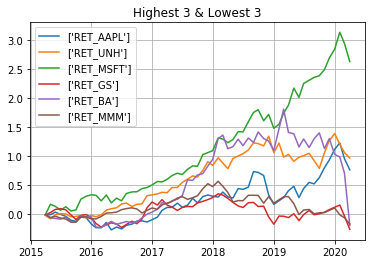

In [116]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for ticker in labels:
    ax.plot(sample_ret[ticker], label=[ticker])

# NOTE: do we need this?
# ax.set_xlim(sample_ret.index[1], sample_ret.index[-1])       

ax.grid(True)

ax.set_title("Highest 3 & Lowest 3")

ax.legend(loc='best')

## PART III

### 1. Use the DataFrame returns_mon to create a new DataFrame named data_intial that only has the data from January 2013 to December 2017. In addition, create another DataFrame named data_post to store the 2018 and 2019 data.

In [128]:
data_initial = returns_mon['01/01/2013':'12/31/2017']
data_initial.head()

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,-0.015471,0.004233,-0.017307,-0.016605,0.003275,-0.018124,-0.011658,-0.016096,-0.008938,-0.013430,...,-0.006018,-0.009474,-0.013868,-0.022651,-0.013812,-0.003815,-0.010026,-0.003399,-0.007384,0.0
2015-04-30,0.005770,-0.008614,-0.045949,0.090380,0.046140,0.056301,0.035864,0.043973,-0.060129,0.065064,...,-0.025031,-0.022094,-0.067125,-0.060012,-0.029879,0.009737,0.047769,-0.052413,0.027501,0.0
2015-05-29,0.044341,0.028888,-0.013481,-0.018119,0.016512,-0.065426,0.015063,0.051657,0.040665,0.005593,...,0.032121,-0.014186,0.000099,0.076113,0.035091,0.040795,-0.020025,-0.043352,-0.016914,0.0
2015-06-30,-0.037938,-0.021673,-0.012892,-0.005877,-0.065198,-0.065497,0.033587,0.012531,0.002691,-0.042075,...,-0.035739,-0.001915,-0.038947,0.019007,-0.054727,-0.022529,-0.058945,-0.046013,-0.023754,0.0
2015-07-31,-0.033481,-0.021590,0.038536,-0.066587,0.042040,-0.086455,0.055865,-0.017978,0.051729,-0.004127,...,0.072744,-0.011725,0.093371,-0.004930,-0.100634,0.115082,0.015563,0.014695,-0.049144,0.0


In [133]:
data_post = returns_mon['01/01/2018':'12/31/2019']
data_post.head()

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,-0.010693,0.004428,0.183671,0.037097,0.088638,0.001277,0.010732,0.050255,0.058260,0.064856,...,0.022387,-0.054600,0.100097,0.071415,0.078661,0.085761,0.032635,0.076492,0.042829,1.0
2018-02-28,0.065961,-0.019197,0.026807,-0.051364,0.075105,-0.103420,-0.052035,-0.015886,-0.097318,-0.039472,...,-0.010684,-0.094940,-0.075628,-0.045889,-0.018439,-0.008699,-0.124510,-0.169163,-0.131870,0.0
2018-03-30,-0.059804,-0.044349,-0.099576,-0.048021,-0.043123,0.018765,-0.026721,-0.043014,-0.016671,-0.015521,...,-0.022842,0.009633,0.004190,-0.051961,-0.068495,-0.027376,0.001674,-0.005677,-0.015032,0.0
2018-04-30,-0.015134,0.060733,0.017175,-0.015682,0.040127,0.092644,-0.001096,-0.055217,0.036143,-0.056787,...,0.031070,-0.082395,-0.053699,0.099549,-0.046111,0.058921,0.043998,-0.005749,0.041224,0.0
2018-05-31,0.126742,-0.004567,0.059239,0.050978,-0.036326,0.002187,-0.008609,-0.050122,0.015008,-0.014462,...,-0.009034,0.011408,-0.023682,0.021386,0.043757,0.031422,-0.034635,-0.062987,0.053994,0.0


### 2. Create a DataFrame named rf_rate to store the risk free rate over the period from January 2013 to December 2019. The risk-free rate  is available in the ff_factors19.csv file on Blackboard.

In [138]:
#reading in data
rf_rate = pd.read_csv("ff_factors19.csv",
                     index_col='dateff',
                     usecols=['dateff', 'rf'],
                     parse_dates=True)

rf_rate.head()

,rf
dateff,
1926-07-31,0.0022
1926-08-31,0.0025
1926-09-30,0.0023
1926-10-30,0.0032
1926-11-30,0.0031


### 3a. Use the DataFrames data_initial and rf_rate, in conjunction with Scipy' s minimize() function to find the optimal portfolio (highest Sharpe ratio) from the universe of stocks comprised of all the stocks in your sample. (Assume there are no short-selling constraints).

In [ ]:
# more finance topics lecture material

### 3b. The weights of the stocks in the optimal portfolio are:

### 3c. The optimal portfolio return is:

### 3d. The optimal portfolio standard deviation is:

### 3e. The Sharpe Ratio the optimal portfolio is:

### 4a. What is the return of the Global Minimum Variance Portfolio (GMVP)

### 4b. What is the standard deviation of the Global Minimum Variance Portfolio (GMVP)

### 4c. What are the weights of the stocks in the Global Minimum Variance Portfolio (GMVP)

### 5. Use Scipy's minimize() function to solve for the efficient frontier. In addition, plot it, add to the plot the fifteen stocks, the GMVP, the optimal portfolio, as well as the Capital Allocation Line.

## PART IV

### 1. Create a DataFrame named weights with three columns: 1) TICKER; 2) Optimal_Weights and 3) Equal_Weights for each ticker.

In [ ]:
# creating df

### 2. Using the DataFrames data_post and weights, compute the two portfolio (Optimal and Equal-weighted) monthy returns over the period January 1st, 2018 and December 31st, 2019. Store the portfolio returns into a new DataFrame named port_returns. Label the two columns as 'Optimal Portfolio' and 'EW_Portfolio'

In [ ]:
# we have to do part three before this

### 3. In a single output, provide summary statistics on the two portfolios.

In [ ]:
# one function

### 4a. Compute the two-year cumulative return series for both portfolios and plot them in the same graph. 

### 4b. What was the two-year cumulative return for the best performer? What was the two-year cumulative return for the worst performer?